# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [3]:
import pandas as pd

In [4]:
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 0)

In [5]:
import openpyxl

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [6]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000)

In [7]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [8]:
df.shape

(30000, 15)

## Answer: we had more, but now we have 30 000 rows. And here are the column types:

In [9]:
df.dtypes

Owner Zip Code            int64         
Animal Name               object        
Animal Gender             object        
Primary Breed             object        
Secondary Breed           object        
Animal Dominant Color     object        
Animal Secondary Color    object        
Animal Third Color        object        
Animal Birth              datetime64[ns]
Spayed or Neut            object        
Guard or Trained          object        
Vaccinated                object        
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a dog license (current at the end of April 2016) of a dog that lives in NYC. 
`Owner ZIP code` is a ZIP code in NYC where the owner of the dog lives (hopefully with the dog).
`License Expired Date` is the date until when this particular license is valid.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

I remember this article by Mona Chalabi: https://www.theguardian.com/us-news/2017/jul/22/dog-names-new-york-city-most-common 
So, let's try to go beyond the most popular names by borough and the most popular breeds. 
We could ask:
- Which breed is most common to be a guard in NYC?
- Which breed is the least vaccinated?
- Which zipcodes have the most dogs of unknown breed?
- Which zipcode has the biggest concentration of dogs?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

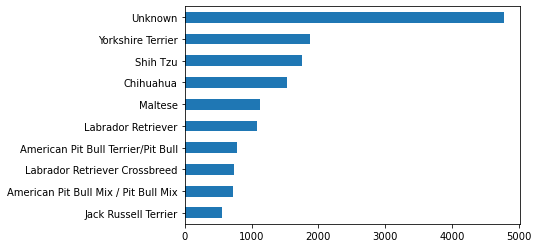

In [10]:
df['Primary Breed'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

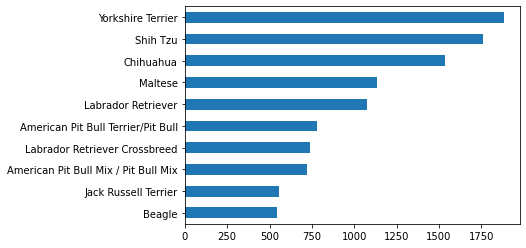

In [11]:
df[df['Primary Breed'] != 'Unknown']\
['Primary Breed'].value_counts()\
.head(10).sort_values(ascending=True)\
.plot(kind='barh')

## What are the most popular dog names?

In [12]:
df[(df['Animal Name'] != 'Unknown')\
&(df['Animal Name'] != 'UNKNOWN')]\
['Animal Name'].value_counts().head(7)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [13]:
df[df['Animal Name'] == 'Anastasia']

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
6170,10016,Anastasia,F,Yorkshire Terrier,NaN,Black,Brown,Blond,2011-05-01,No,NaN,Yes,2015-05-06 15:31:19.873,2015-05-06,2016-05-06
7298,10468,Anastasia,F,Yorkshire Terrier,NaN,BLACK,TAN,NaN,2013-10-01,Yes,No,Yes,2015-05-13 22:59:30.477,2015-05-13,2017-05-14
8589,11229,Anastasia,F,Unknown,Shih Tzu Mix,WHITE,BROWN,NaN,2009-01-01,Yes,No,No,2015-05-22 11:17:57.377,2015-05-22,2016-06-22
17906,10023,Anastasia,F,Bichon Frise,NaN,WHITE,APRICOT,NaN,2006-03-01,Yes,No,Yes,2015-07-03 10:27:05.143,2015-07-03,2016-08-11


In [14]:
df[df['Animal Name'] == 'Max'].shape

(202, 15)

In [15]:
df[df['Animal Name'] == 'Maxwell'].shape

(11, 15)

## Answer: 4 dogs have my name, among them one Bichon Frise. There are 202 dogs named Max and 11 dogs named Maxwell in the dataset.

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [16]:
df['Guard or Trained'].value_counts(normalize=True)*100

No     99.914254
Yes    0.085746 
Name: Guard or Trained, dtype: float64

## Answer: just 0.05 % of all dogs are guards dogs.

## What are the actual numbers?

In [17]:
df[df['Guard or Trained'] == 'Yes'].shape

(17, 15)

### There are 17 guard dogs.

In [18]:
df[df['Guard or Trained'] == 'No'].shape

(19809, 15)

### and 19 809 which are not. But this does not add up to 30 000. 

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [19]:
df['Guard or Trained'].head(5)

0    No 
1    No 
2    NaN
3    No 
4    NaN
Name: Guard or Trained, dtype: object

In [20]:
df['Guard or Trained'].value_counts(dropna=False)

No     19809
NaN    10174
Yes    17   
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [21]:
df['Guard or Trained'].fillna(value = "No",  inplace=True)

In [22]:
df['Guard or Trained'].value_counts(dropna=False)

No     29983
Yes    17   
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [23]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts().head(5)

Unknown                 5
German Shepherd Dog     3
Rottweiler              1
Schnauzer, Miniature    1
Golden Retriever        1
Name: Primary Breed, dtype: int64

### I am keeping 'unknown' breed here because they are the biggest group actually, which is kind of interesting.

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [24]:
df['Year'] = df['Animal Birth'].apply(lambda birth: birth.year)

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [25]:
df['Age'] = 2021-df['Year']

In [26]:
df['Age'].mean().round()

12.0

### The dogs in the dataset are on average 12 years old, which is quite a lot for a dog.

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [27]:
df_nb = pd.read_csv("zipcodes-neighborhoods.csv")

In [28]:
df_nb.head(5)

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [29]:
df = df.merge(df_nb, left_on='Owner Zip Code', right_on='zip')

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [30]:
df[df['borough'] == "Bronx"]['Animal Name'].value_counts().head(1)

Bella    22
Name: Animal Name, dtype: int64

In [31]:
df[df['borough'] == "Brooklyn"]['Animal Name'].value_counts().head(2)

Unknown    97
Max        46
Name: Animal Name, dtype: int64

In [32]:
df[df['neighborhood'] == "Upper East Side"]['Animal Name'].value_counts().head(1)

Charlie    19
Name: Animal Name, dtype: int64

### Answer: The most popular dog name in Bronx is Bella, in Brooklyn -- Max (while quite a lot of dogs have 'unknown' instead of a name), and 'Charlie' is the most popular dog name in Upper East Side, according to our dataset.

## What is the most common dog breed in each of the neighborhoods of NYC?

In [33]:
df[df['Primary Breed'] != 'Unknown'].groupby(['neighborhood'])\
['Primary Breed'].value_counts().groupby('neighborhood').head(1)

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                       49 
Bronx Park and Fordham         Yorkshire Terrier                       39 
Bushwick and Williamsburg      Yorkshire Terrier                       47 
Canarsie and Flatlands         Shih Tzu                                56 
Central Bronx                  Yorkshire Terrier                       29 
Central Brooklyn               Shih Tzu                                52 
Central Harlem                 Chihuahua                               48 
Central Queens                 Yorkshire Terrier                       34 
Chelsea and Clinton            Chihuahua                               80 
East Harlem                    Yorkshire Terrier                       44 
East New York and New Lots     Yorkshire Terrier                       25 
Flatbush                       Shih Tzu                                38 
Gramercy Park and Murray Hill  Y

## What breed of dogs are the least likely to be spayed? Male or female?

In [34]:
(df[df['Primary Breed'] != 'Unknown'].groupby(['Animal Gender'])\
['Spayed or Neut'].value_counts(normalize=True)*100).round()

Animal Gender  Spayed or Neut
               Yes               100.0
F              Yes               84.0 
               No                16.0 
M              Yes               77.0 
               No                23.0 
Name: Spayed or Neut, dtype: float64

### Answer: female dogs are more likely to be spayed.

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [35]:
df['Monochrome'] = (df['Animal Dominant Color'] == 'Black')\
|(df['Animal Dominant Color'] == 'White')\
|(df['Animal Dominant Color'] == 'Grey')
df['Monochrome'].value_counts()

False    24353
True     5220 
Name: Monochrome, dtype: int64

### Answer: At least 5220 dogs are monochrome.

## How many dogs are in each borough? Plot it in a graph.

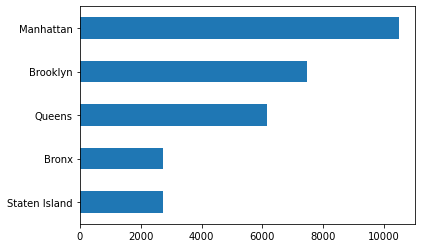

In [36]:
df['borough'].value_counts().sort_values(ascending = True).plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [37]:
df_pop = pd.read_csv("boro_population.csv")

In [38]:
df_pop

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [39]:
df_dogs = df['borough'].value_counts().reset_index()

In [37]:
df_dogs

,index,borough
0,Manhattan,10478
1,Brooklyn,7466
2,Queens,6154
3,Bronx,2748
4,Staten Island,2727


In [40]:
df_dogs_per_b = df_dogs.merge(df_pop, left_on = 'index', right_on="borough")

In [40]:
df_dogs_per_b

,index,borough_x,borough_y,population,area_sqmi
0,Manhattan,10478,Manhattan,1644518,23
1,Brooklyn,7466,Brooklyn,2636735,71
2,Queens,6154,Queens,2339150,109
3,Bronx,2748,Bronx,1455444,42
4,Staten Island,2727,Staten Island,474558,59


In [41]:
df_dogs_per_b['rate']\
= ((df_dogs_per_b['borough_x']/df_dogs_per_b['population'])*1000).round()

In [42]:
df_dogs_per_b.sort_values(by=['rate'], ascending=False).head(1)

,index,borough_x,borough_y,population,area_sqmi,rate
0,Manhattan,10478,Manhattan,1644518,23,6.0


### Answer: Manhattan has the highest rate of 6 dogs per 1000 people.

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [43]:
df_known = df[df['Primary Breed'] != 'Unknown']

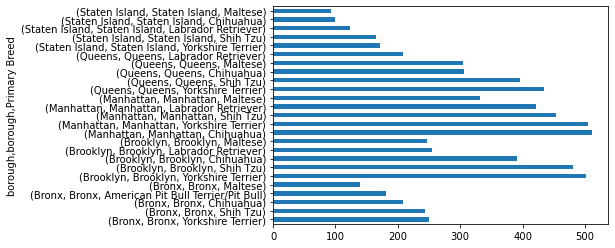

In [44]:
df_known.groupby('borough')['Primary Breed'].value_counts().\
groupby(level=0).nlargest(5).plot(kind='barh')

### Below I am trying to create grouped bar chart having watched the video tutorial. Here is version 1 that is using to_frame, reset_index and pivot_table:

In [52]:
df_bar = df.groupby('borough')['Primary Breed'].value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(5) \
    .to_frame(name='counts')\
    .reset_index()

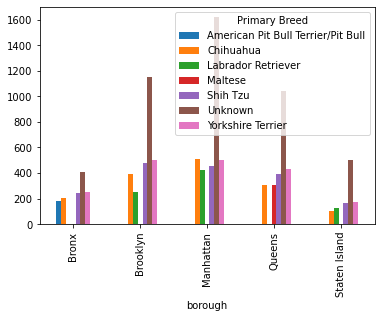

In [60]:
df_bar.pivot_table(index='borough', columns = 'Primary Breed').plot(kind='bar', y='counts')

### Version 2 using unstack seemed to be faster:

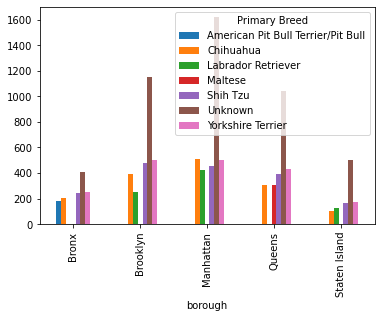

In [138]:
df.groupby('borough')['Primary Breed'].value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(5).unstack().plot(kind='bar')

## What percentage of dogs are not guard dogs?

In [46]:
(df['Guard or Trained'].value_counts(normalize=True)*100).round()

No     100.0
Yes      0.0
Name: Guard or Trained, dtype: float64

### Answer: Almost all of them